In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Loading the dataset
data = pd.read_excel('car_prices.xlsx')
print(data.head())

   year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2  wba3c1c51ek116351    ca       45.0    1331.0   gray    black   
3  yv1612tb4f1310987    ca       41.0   14282.0  white    black   
4  wba6b2c57ed129731    ca       43.0    2641.0   gray    black   

                     seller      mmr  sellingprice  \
0  1 cochran of monroeville  20500.0       21500.0   
1  1 cochran of monroeville  20800.0       21500.0   
2  1 coc

In [6]:
# 1. Inspecting the Data
print("Number of rows and columns:", data.shape)
print("\nData types of each column:\n", data.dtypes)

Number of rows and columns: (558837, 16)

Data types of each column:
 year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object


In [7]:
# 2. Understanding the Variables
print("\nColumn names:", data.columns)


Column names: Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')


In [8]:
# 3. Checking for Missing Values
print("\nNumber of missing values in each column:\n", data.isnull().sum())


Number of missing values in each column:
 year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64


In [9]:
# 4. Exploring Descriptive Statistics
print("\nDescriptive statistics of numerical columns:\n", data.describe())


Descriptive statistics of numerical columns:
                 year      condition       odometer            mmr  \
count  558837.000000  547017.000000  558743.000000  558799.000000   
mean     2010.038927      30.672365   68320.017767   13769.377495   
std         3.966864      13.402832   53398.542821    9679.967174   
min      1982.000000       1.000000       1.000000      25.000000   
25%      2007.000000      23.000000   28371.000000    7100.000000   
50%      2012.000000      35.000000   52254.000000   12250.000000   
75%      2013.000000      42.000000   99109.000000   18300.000000   
max      2015.000000      49.000000  999999.000000  182000.000000   

        sellingprice  
count  558825.000000  
mean    13611.358810  
std      9749.501628  
min         1.000000  
25%      6900.000000  
50%     12100.000000  
75%     18200.000000  
max    230000.000000  


In [10]:
# Exploring categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print("\nUnique values in", col, ":", data[col].unique())
    print("Value counts:\n", data[col].value_counts())


Unique values in make : ['Kia' 'BMW' 'Volvo' 'Nissan' 'Chevrolet' 'Audi' 'Ford' 'Hyundai' 'Buick'
 'Cadillac' 'Acura' 'Lexus' 'Infiniti' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Mazda' 'MINI' 'Land Rover' 'Lincoln' 'lincoln' 'Jaguar' 'Volkswagen'
 'Toyota' 'Subaru' 'Scion' 'Porsche' nan 'bmw' 'Dodge' 'FIAT' 'Chrysler'
 'ford' 'Ferrari' 'Honda' 'GMC' 'mitsubishi' 'Ram' 'smart' 'chevrolet'
 'Bentley' 'chrysler' 'pontiac' 'Pontiac' 'Saturn' 'Maserati' 'Mercury'
 'HUMMER' 'landrover' 'cadillac' 'land rover' 'mercedes' 'mazda' 'toyota'
 'lexus' 'gmc truck' 'honda' 'nissan' 'porsche' 'Saab' 'Suzuki' 'dodge'
 'subaru' 'Oldsmobile' 'oldsmobile' 'hyundai' 'jeep' 'Isuzu' 'dodge tk'
 'Geo' 'acura' 'volkswagen' 'suzuki' 'kia' 'audi' 'Rolls-Royce' 'gmc'
 'maserati' 'mazda tk' 'mercury' 'buick' 'hyundai tk' 'mercedes-b' 'vw'
 'Daewoo' 'chev truck' 'ford tk' 'plymouth' 'Plymouth' 'ford truck'
 'Tesla' 'airstream' 'dot' 'Aston Martin' 'Fisker' 'Lamborghini' 'Lotus']
Value counts:
 Ford          93554
Ch


Unique values in vin : ['5xyktca69fg566472' '5xyktca69fg561319' 'wba3c1c51ek116351' ...
 '5uxzw0c58cl668465' '1n4al3ap0fc216050' '1ftfw1et2eke87277']
Value counts:
 automatic            22
wbanv13588cz57827     5
5uxfe43579l274932     4
trusc28n241022003     4
wddgf56x78f009940     4
                     ..
1p3ew65g7yv603989     1
4t1bf28b1yu016829     1
jtdbt1231y0082703     1
jtddr32t8y0063746     1
1ftfw1et2eke87277     1
Name: vin, Length: 550297, dtype: int64

Unique values in state : ['ca' 'tx' 'pa' 'mn' 'az' 'wi' 'tn' 'md' 'fl' 'ne' 'nj' 'nv' 'oh' 'mi'
 'ga' 'va' 'sc' 'nc' 'in' 'il' 'co' 'ut' 'mo' 'ny' 'ma' 'pr' 'or' 'la'
 'wa' 'hi' 'qc' 'ab' 'on' 'ok' 'ms' 'nm' 'al' '3vwd17aj4fm201708' 'ns'
 '3vwd17aj2fm258506' '3vwd17aj3fm276741' '3vwd17aj2fm285365'
 '3vwd17aj0fm227318' '3vwd17aj6fm218641' '3vwd17aj7fm223475'
 '3vwd17aj5fm297123' '3vwd17aj5fm219943' '3vwd17aj9fm219766'
 '3vwd17aj3fm259017' '3vwd17aj5fm206111' '3vwd17aj5fm273601'
 '3vwd17aj5fm221322' '3vwd17aj5fm268964' '3vwd1


Histogram for year


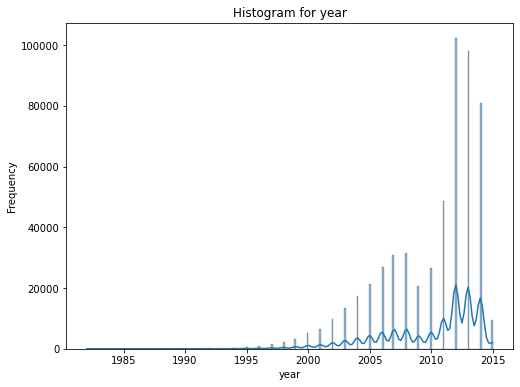


Histogram for condition


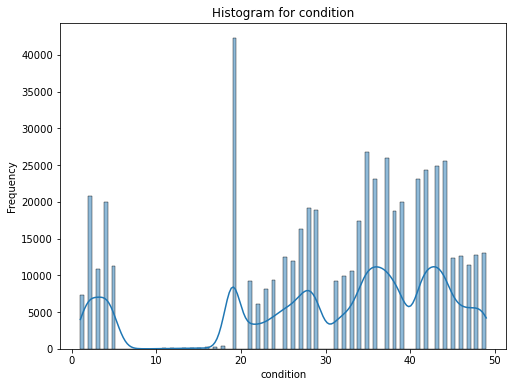


Histogram for odometer


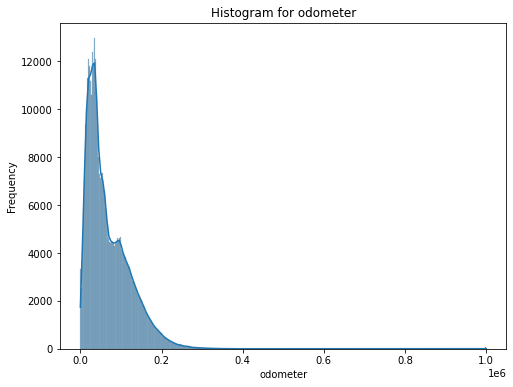


Histogram for mmr


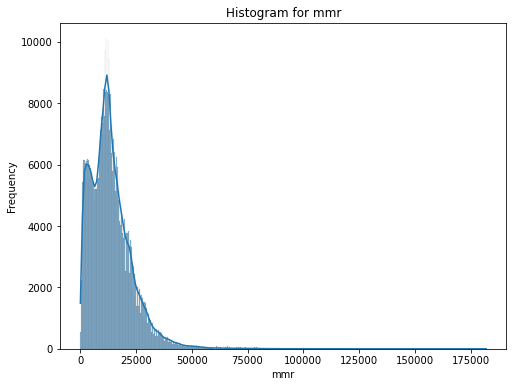


Histogram for sellingprice


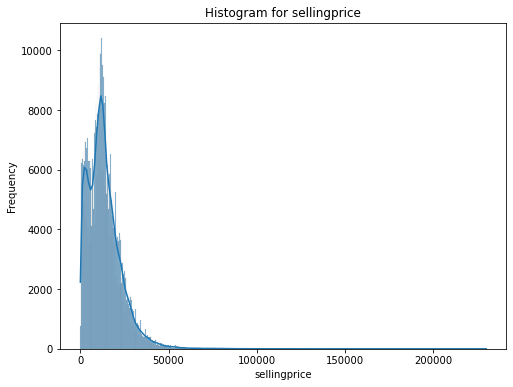

In [14]:
# Exploring numerical variables
numerical_columns = data.select_dtypes(include=['int', 'float']).columns
for col in numerical_columns:
    print("\nHistogram for", col)
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title("Histogram for {}".format(col))
    plt.show()

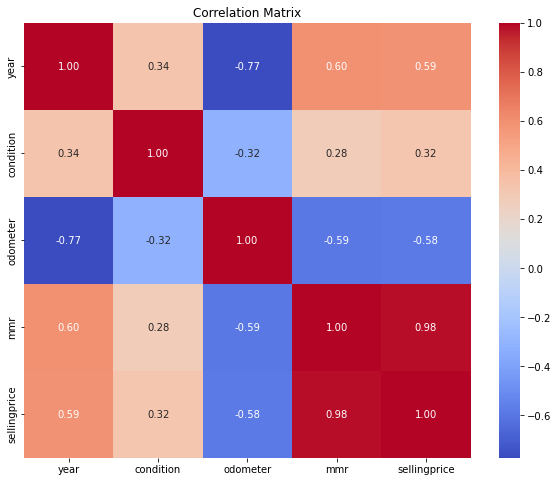

In [15]:
# Exploring relationships between variables (correlation matrix)
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

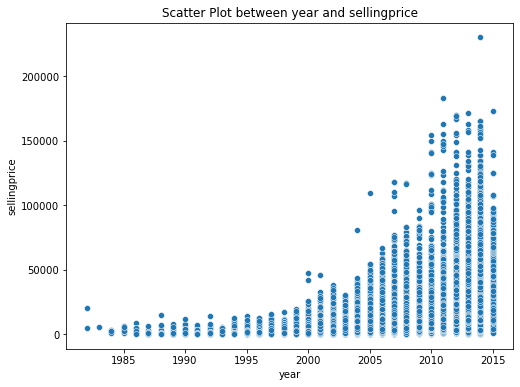

In [19]:
# Visualizing relationships between variables (scatter plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='year', y='sellingprice', data=data)
plt.xlabel('year')
plt.ylabel('sellingprice')
plt.title('Scatter Plot between year and sellingprice')
plt.show()

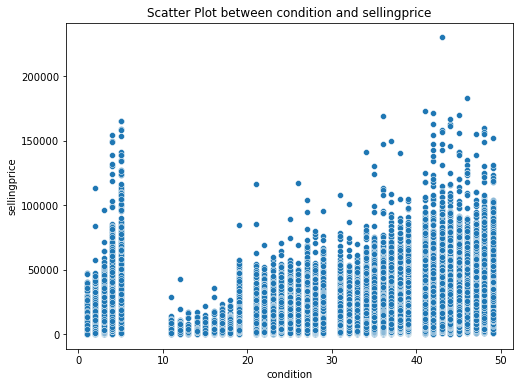

In [20]:
# Visualizing relationships between variables (scatter plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='condition', y='sellingprice', data=data)
plt.xlabel('condition')
plt.ylabel('sellingprice')
plt.title('Scatter Plot between condition and sellingprice')
plt.show()